# EDA (Exploratory Data Analysis)

## Import libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_auc_score
import pickle
import warnings
warnings.filterwarnings("ignore")

## Dataset description

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.<br>
[Source: Estimation of obesity levels based on eating habits and physical condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

| Variable Name | Role | Description |
| :--- | :--- | :--- |
| Gender | Feature | |
| Age | Feature | |
| Height | Feature | |
| Weight | Feature | |
| family_history_with_overweight | Feature | Has a family member suffered or suffers from overweight? |
| FAVC | Feature | Do you eat high caloric food frequently? |
| FCVC | Feature | Do you usually eat vegetables in your meals? |
| NCP | Feature | How many main meals do you have daily? |
| CAEC | Feature | Do you eat any food between meals? |
| SMOKE | Feature | Do you smoke? |
| CH2O | Feature | How much water do you drink daily? |
| SCC | Feature | Do you monitor the calories you eat daily? |
| FAF | Feature | How often do you have physical activity? |
| TUE | Feature | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC | Feature | How often do you drink alcohol? |
| MTRANS | Feature | Which transportation do you usually use? |
| NObeyesdad | Target | Obesity level |

## Load dataset

In [3]:
df = pd.read_csv("./data/data.csv")

## Understanding the data

In [156]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [158]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [159]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Axes: xlabel='NObeyesdad'>

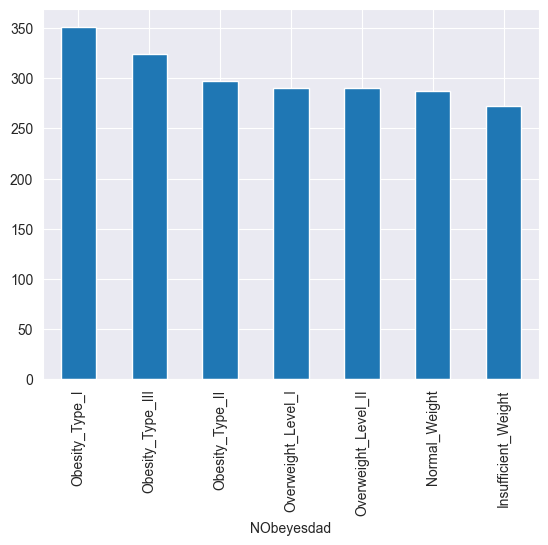

In [160]:
df['NObeyesdad'].value_counts().plot(kind='bar')

## Data vizualisation

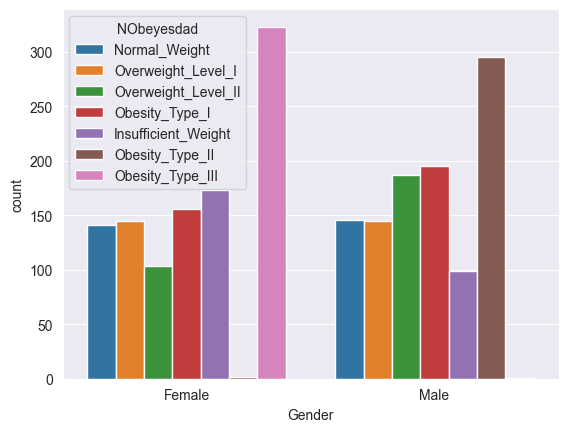

In [161]:
sns.countplot(data=df, x='Gender', hue='NObeyesdad')
plt.show()

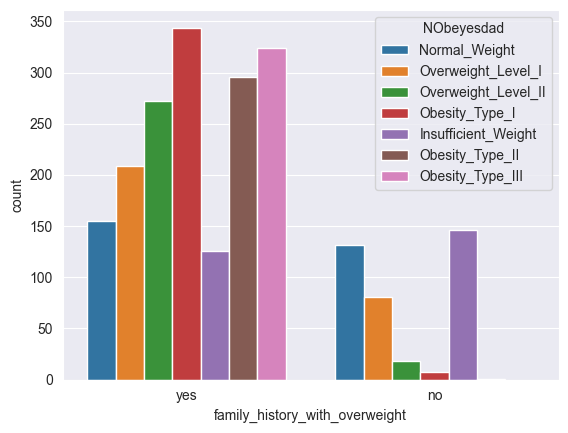

In [162]:
sns.countplot(data=df, x='family_history_with_overweight', hue='NObeyesdad')
plt.show()

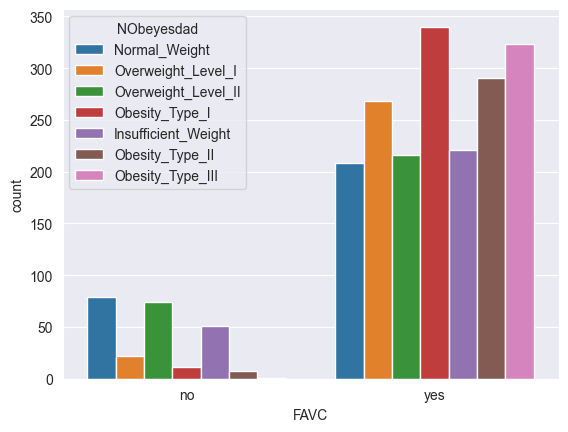

In [163]:
sns.countplot(data=df, x='FAVC', hue='NObeyesdad')
plt.show()

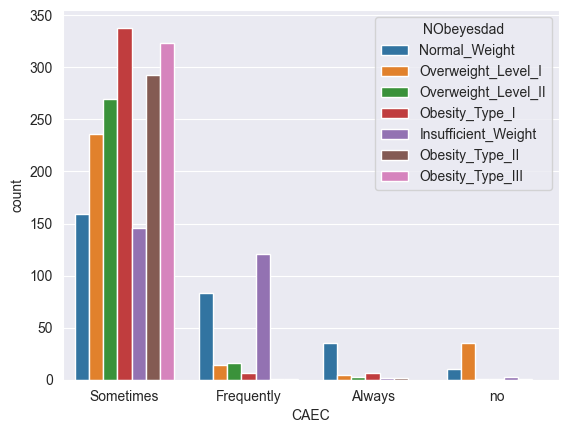

In [164]:
sns.countplot(data=df, x='CAEC', hue='NObeyesdad')
plt.show()

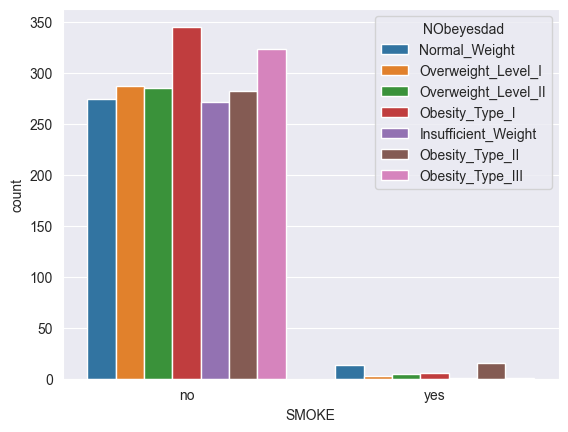

In [165]:
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad')
plt.show()

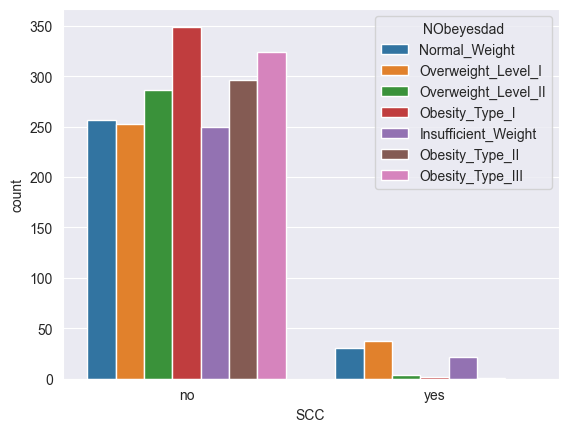

In [166]:
sns.countplot(data=df, x='SCC', hue='NObeyesdad')
plt.show()

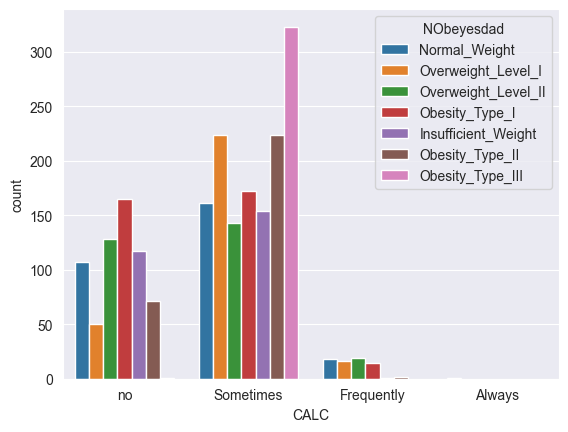

In [167]:
sns.countplot(data=df, x='CALC', hue='NObeyesdad')
plt.show()

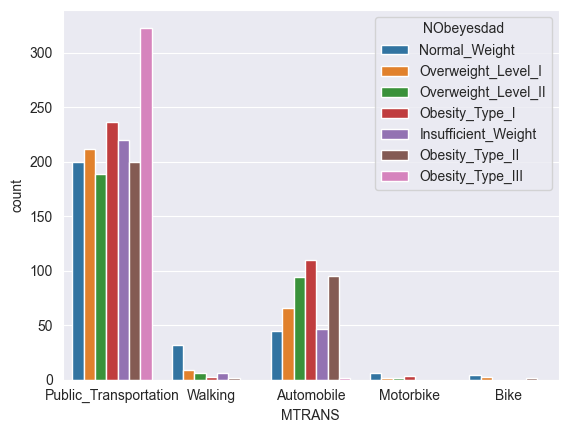

In [168]:
sns.countplot(data=df, x='MTRANS', hue='NObeyesdad')
plt.show()

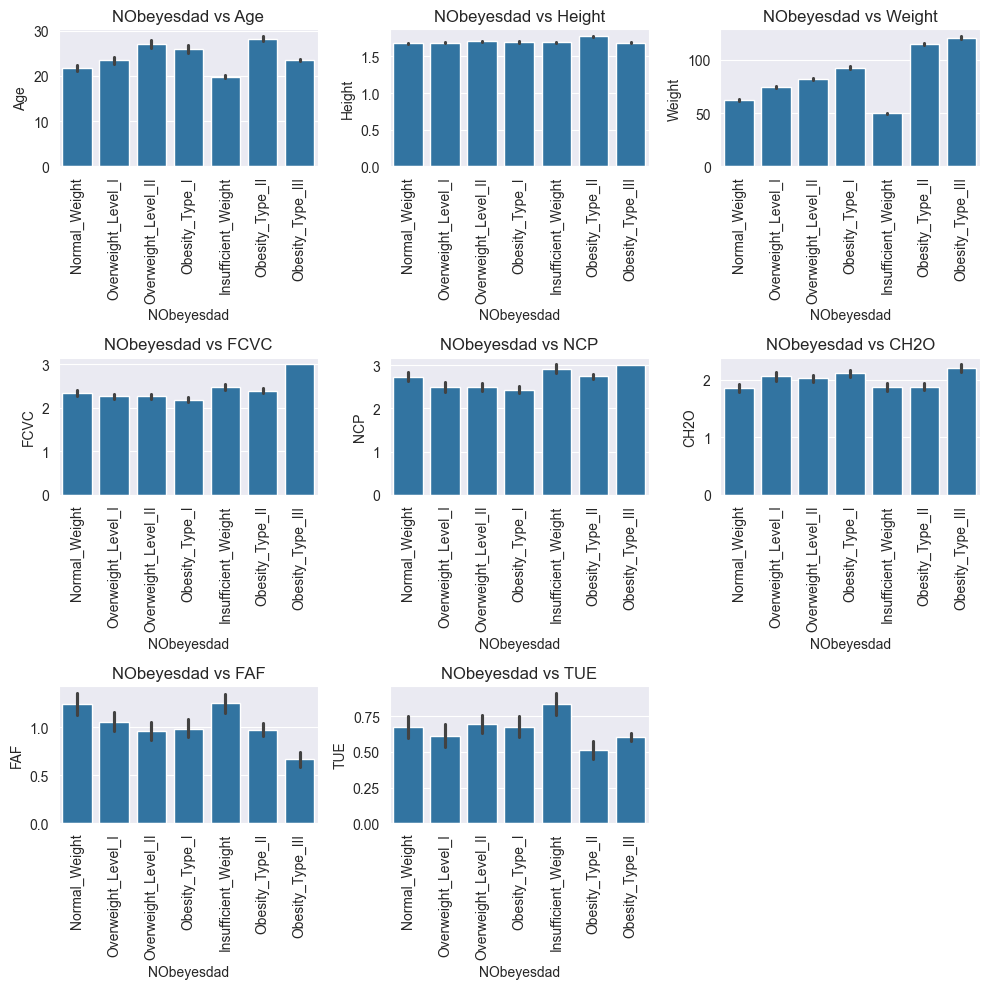

In [169]:
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.barplot(x='NObeyesdad', y=column, data=df, dodge=True, ax=axes[i])
    axes[i].set_title(f'NObeyesdad vs {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90) 
    

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Building model & Evaluation

## Data preparation

### Encoding the categorical columns

In [4]:
# Create a label encoder object
le = LabelEncoder()

# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder on each of the categorical columns:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"{col} mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender mapping: {'Female': 0, 'Male': 1}
family_history_with_overweight mapping: {'no': 0, 'yes': 1}
FAVC mapping: {'no': 0, 'yes': 1}
CAEC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE mapping: {'no': 0, 'yes': 1}
SCC mapping: {'no': 0, 'yes': 1}
CALC mapping: {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS mapping: {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}
NObeyesdad mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


### Splitting data into train / test sets

In [5]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Keeping 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(f'The shape of train data is: {X_train.shape}')
print(f'The shape of test data is: {X_test.shape}')

The shape of train data is: (1688, 16)
The shape of test data is: (423, 16)


## Finding the best model

In [62]:
# Define the models and parameters
classifiers = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}),
    'LogisticRegression': (LogisticRegression(multi_class='multinomial'), {'C': [0.1, 1, 5, 10], 'max_iter': [100, 200, 300]}),
    'SVM': (SVC(), {'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [1, 5, 10, 15, 20], 'criterion': ['gini', 'entropy']}),
    'MLPClassifier': (MLPClassifier(learning_rate='adaptive', early_stopping=True), {'hidden_layer_sizes': [(64,), (128,)], 'solver': ['adam', 'sgd'], 'learning_rate_init': [0.0025, 0.0050], 'max_iter': [100, 150, 200], 'batch_size': [40, 60, 80], 'activation': ['relu', 'tanh']})
}

# Initialize lists to store results
models = []
accuracy_mean = []
accuracy_min = []
accuracy_max = []

# Apply GridSearchCV to each classifier
for name, (model, params) in classifiers.items():
    gs = GridSearchCV(model, params, cv=5, return_train_score=True)
    gs.fit(X_train.values, y_train.values)
    
    # Append results
    models.append(name)
    accuracy_mean.append(np.mean(gs.cv_results_['mean_test_score']))
    accuracy_min.append(np.min(gs.cv_results_['mean_test_score']))
    accuracy_max.append(np.max(gs.cv_results_['mean_test_score']))

    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Best score for {name}: {gs.best_score_}")

Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
Best score for DecisionTree: 0.9490527276877426
Best parameters for LogisticRegression: {'C': 10, 'max_iter': 300}
Best score for LogisticRegression: 0.7470352747001914
Best parameters for SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Best score for SVM: 0.9514266149280987
Best parameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 3}
Best score for KNN: 0.8720541499130864
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Best score for XGBoost: 0.9650553965550543
Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
Best score for RandomForest: 0.9543904623110283
Best parameters for MLPClassifier: {'activation': 'tanh', 'batch_size': 80, 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.005, 'max_iter': 100, 'solver': 'adam'}
Best score for MLPClassifier: 0.814013309219883


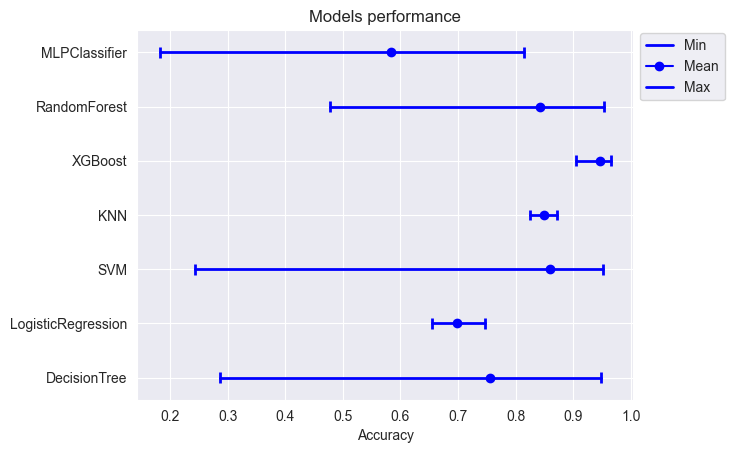

In [77]:
data = list(zip(accuracy_mean, accuracy_min, accuracy_max))

fig, ax = plt.subplots()

mean_line = mlines.Line2D([], [], color='blue', marker='o', markersize=6, label='Mean')
min_line = mlines.Line2D([], [], color='blue', linestyle='-', linewidth=2, label='Min')
max_line = mlines.Line2D([], [], color='blue', linestyle='-', linewidth=2, label='Max')

for i, (mean, min_score, max_score) in enumerate(data):
    ax.plot(mean, i, marker='o', color='blue', markersize=6)
    ax.vlines(min_score, i - 0.1, i + 0.1, color='blue', linewidth=2)
    ax.vlines(max_score, i - 0.1, i + 0.1, color='blue', linewidth=2)
    
    ax.plot([min_score, max_score], [i, i], color='blue', linewidth=2)

ax.set_yticks(range(len(models)))
ax.set_yticklabels(models, ha='right')
ax.set_xlabel('Accuracy')
ax.set_title('Models performance')
plt.grid(True)

legend = plt.legend(handles=[min_line, mean_line, max_line], bbox_to_anchor=(1, 1.01), loc='upper left')

plt.show()

## Training and evaluating the model

In [78]:
# Create a new XGBClassifier with the best parameters
model = XGBClassifier(learning_rate=0.2, n_estimators=200)

# Train the model
model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_test.values)
y_pred_proba = model.predict_proba(X_test.values)

# Calculate the accuracy
accuracy = accuracy_score(y_test.values, y_pred)

# Calculate the precision
precision = precision_score(y_test.values, y_pred, average='weighted')

# Calculate the recall
recall = recall_score(y_test.values, y_pred, average='weighted')

# Calculate the F1 score
f1 = f1_score(y_test.values, y_pred, average='weighted')

# Calculate the confusion matrix
cm = confusion_matrix(y_test.values, y_pred)

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test.values, y_pred_proba, multi_class='ovr')

print(f"Accuracy: {round(accuracy * 100, 2)}%")
print(f"Precision: {round(precision * 100, 2)}%")
print(f"Recall: {round(recall * 100, 2)}%")
print(f"F1 Score: {round(f1 * 100, 2)}%")
print(f"AUC-ROC: {round(roc_auc * 100, 2)}%")

Accuracy: 95.74%
Precision: 95.85%
Recall: 95.74%
F1 Score: 95.74%
AUC-ROC: 99.88%


Text(95.72222222222221, 0.5, 'Truth')

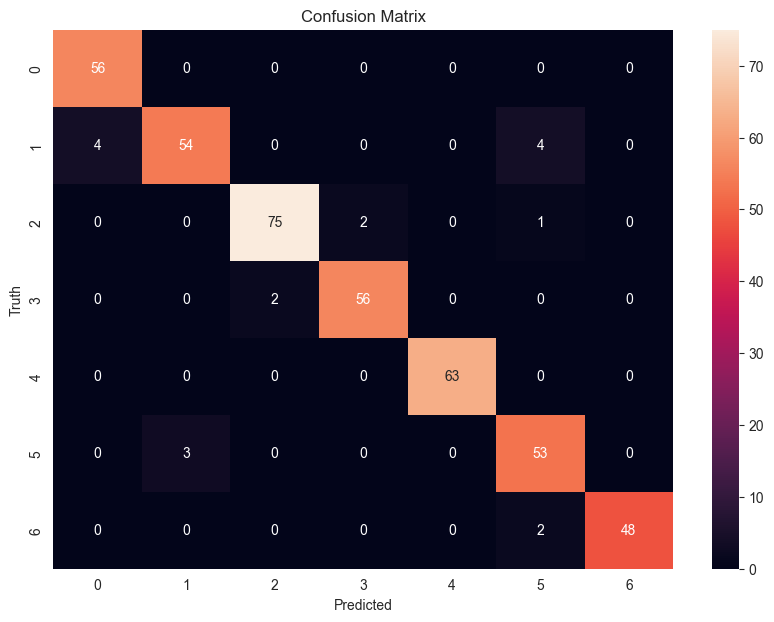

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Predicting on a single example

In [81]:
test_example = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [82]:
test_example

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [83]:
prediction = model.predict(test_example)
print('The prediction of obesity level is:', le.classes_[prediction][0])

The prediction of obesity level is: Insufficient_Weight


## Saving the model

In [84]:
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))